# References

1. Excerpts from the [PyTorch Pocket Reference](http://pytorchbook.com) book by [Joe Papa](http://joepapa.ai); content is available [on GitHub](https://github.com/joe-papa/pytorch-book)

2. Code snippets from [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch)

## 1 - PyTorch Setup
<hr>

In this section, we initialize **PyTorch** and configure it to use either a GPU (if available) or a CPU for computations. Determine whether a GPU with CUDA (Compute Unified Device Architecture) support is available. 

> <font color="purple"><i>CUDA is a parallel computing platform and API model created by Nvidia, allowing significant acceleration in computation by utilizing the power of GPUs. This is particularly beneficial for deep learning tasks that are computationally intensive.</i></font>

Also, set the device variable, which will be used to tell PyTorch to allocate tensors to either the GPU or CPU. This allocation is essential for efficient computing.

In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())
print(device)

2.1.1+cu118
True
cuda


In [3]:
a = torch.ones(3, 3)
b = torch.ones(3, 3)

a + b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [4]:
a = torch.ones(3, 3, device=device)
b = torch.ones(3, 3, device=device)

a + b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')

## 2 - Pre-Trained Networks
<hr>

Instead of training models from scratch, deep learning often utilizes **transfer learning** to leverage pre-trained models. These models, trained on large datasets, have already learned robust features.

We'll use two such pre-trained models for image classification:

- **AlexNet:** A breakthrough model in the field of deep learning, particularly for image classification. It was the pioneer in using deep convolutional neural networks and won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012.

- **VGG16:** Another influential model, known for its simplicity and depth. VGG16 consists of 16 layers and is celebrated for its effectiveness in extracting features from images, contributing significantly to advancements in image recognition tasks.

Transfer learning involves leveraging pre-trained models as the starting point for our tasks. These models, such as AlexNet and VGG16, have been trained on extensive datasets (like ImageNet) and have developed robust feature representations for a wide range of images. By using these pre-trained models, we can benefit from their learned weights and parameters, which have already captured a wealth of information about various visual features.

In [5]:
from torchvision import models

In [15]:
total = dir(models)

print(f"Total available models: {len(total)}")
print("="*30)
print(f"First 5 models:")
print("\n".join([i for i in total[:5]]))

Total available models: 221
First 5 models:
AlexNet
AlexNet_Weights
ConvNeXt
ConvNeXt_Base_Weights
ConvNeXt_Large_Weights


### 2.1 - Target Image for Classification

To demonstrate transfer learning with pre-trained models, let's choose a specific image to classify. This image will serve as our target for testing the capabilities of both 'AlexNet' and 'VGG16' models.

<i><font color="red">Note:</font> Before classification, preprocess the given image to match the input requirements of 'AlexNet' and 'VGG16'. This step ensures that the image is in the correct format and size for these models.</i>

In [16]:
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image

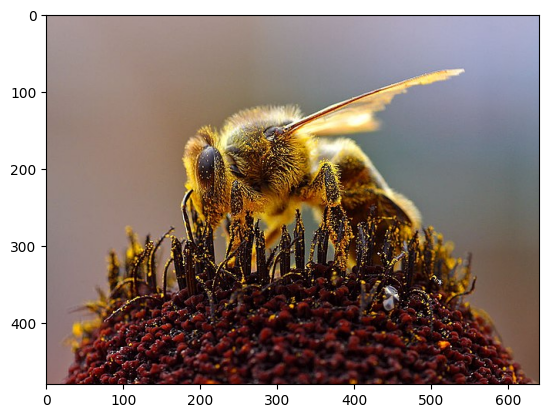

In [20]:
base = "https://upload.wikimedia.org/wikipedia/commons/thumb/"
url = base + "8/81/Bee_Collecting_Pollen_2004-08-14.jpg/640px-Bee_Collecting_Pollen_2004-08-14.jpg"

fpath = 'files/bee.jpg'
urllib.request.urlretrieve(url, fpath)

img = Image.open(fpath)
plt.imshow(img)

#### Image Transformation

In [21]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

img_tensor = transform(img)
print(img_tensor.shape)

torch.Size([3, 224, 224])


In [22]:
batch = torch.unsqueeze(img_tensor, 0)
print("Adding batch dimension:", batch.shape)

Adding batch dimension: torch.Size([1, 3, 224, 224])


### 2.2 - Image Classification with AlexNet

Initialize AlexNet with `pretrained=True`. This ensures that the model is loaded with weights that have already been trained on a large dataset (like ImageNet), allowing us to leverage its learned features for our classification task.

- Once initialized, the model is set to inference mode. This is achieved by calling `.eval()` on the model. The eval() method is crucial as it informs the model that it is in evaluation mode, not training mode. This changes the behavior of specific layers like dropout and batch normalization, which behave differently during training.
- Our preprocessed image tensor is already compatible with AlexNet's input requirements by transforming it accordingly (above).
- Transfer the model to the GPU device for efficient computation.

In [24]:
# load model with pretrained weights
alexnet = models.alexnet(pretrained=True)

# set to eval mode for inference
alexnet.eval()

# transfer model to gpu device
alexnet.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [39]:
from torchinfo import summary

summary(alexnet, input_size=(16, 3, 224, 224), row_settings=("depth", "ascii_only"))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [16, 1000]                --
+ Sequential: 1-1                        [16, 256, 6, 6]           --
|    + Conv2d: 2-1                       [16, 64, 55, 55]          23,296
|    + ReLU: 2-2                         [16, 64, 55, 55]          --
|    + MaxPool2d: 2-3                    [16, 64, 27, 27]          --
|    + Conv2d: 2-4                       [16, 192, 27, 27]         307,392
|    + ReLU: 2-5                         [16, 192, 27, 27]         --
|    + MaxPool2d: 2-6                    [16, 192, 13, 13]         --
|    + Conv2d: 2-7                       [16, 384, 13, 13]         663,936
|    + ReLU: 2-8                         [16, 384, 13, 13]         --
|    + Conv2d: 2-9                       [16, 256, 13, 13]         884,992
|    + ReLU: 2-10                        [16, 256, 13, 13]         --
|    + Conv2d: 2-11                      [16, 256, 13, 13]        

<center><font color="red">The total number of parameters for AlexNet are <b>61,100,840</b>.</font></center>

In [25]:
# Feed the preprocessed image batch to AlexNet for classification

y = alexnet(batch.to(device))
print(y.shape)

torch.Size([1, 1000])


To see the list of predicted labels, we will load a text file listing the labels in the same order they were presented to the network during training, and then we will pick out the label at the index that produced the highest score from the network.

In [28]:
url = "https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/imagenet_class_labels.txt"
fpath = 'files/imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

with open('files/imagenet_class_labels.txt') as f:
    classes = [line.strip() for line in f.readlines()]

In [29]:
print(f"Top 5 classes are:\n")
print("\n".join([i for i in classes[:5]]))

Top 5 classes are:

{0: 'tench, Tinca tinca',
1: 'goldfish, Carassius auratus',
2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
3: 'tiger shark, Galeocerdo cuvieri',
4: 'hammerhead, hammerhead shark',


At this point, we need to determine the index corresponding to the maximum score in the output tensor `y` we obtained previously. We can do that using the `max` function in PyTorch, which outputs:
- the maximum value in a tensor
- the indices where that maximum value occurred

PyTorch tensors are zero-indexed, so a dimension of `1` refers to the second dimension (in this case, the 1000 classes). By specifying `1`, the function finds the maximum value across these 1000 elements.

In [30]:
y_max, index = torch.max(y, 1)
print(index, y_max)

tensor([309], device='cuda:0') tensor([18.7235], device='cuda:0', grad_fn=<MaxBackward0>)


Here, `index` is not a plain Python number, but a one-element, one-dimensional tensor (specifically, tensor([309])), so we
need to get the actual numerical value to use as an index into our classes list using `index[0]`. 

We also use `torch.nn.functional.softmax` to normalize our outputs to the range [0, 1], and divide by the sum. That gives us something roughly akin to the confidence that the model has in its prediction.

In [31]:
# apply softmax to convert output logits to probabilities
# get the probs for the first image in the batch (assuming a batch size of one) 
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100

print(classes[index[0]], prob[index[0]].item())

309: 'bee', 95.59423065185547


<center><font color="green"><u>AlexNet is 95% certain that it knows what it's looking at is a bee.</u></font></center>

Since the model produced scores, we can also find out what the second best, third best, and so on were. To do this, we can use the `sort` function, which sorts the values in ascending or descending order and also provides the indices of the sorted values in the original array:

In [32]:
 _, indices = torch.sort(y, descending=True)
[(classes[idx], prob[idx].item()) for idx in indices[0][:5]]

[("309: 'bee',", 95.59423065185547),
 ("77: 'wolf spider, hunting spider',", 2.027541160583496),
 ("308: 'fly',", 1.1112977266311646),
 ("124: 'crayfish, crawfish, crawdad, crawdaddy',", 0.3891397714614868),
 ("73: 'barn spider, Araneus cavaticus',", 0.2875228822231293)]

### 2.3 - Image Classification with VGG16

Initialize VGG16 with `pretrained=True`, set to inference mode and transfer the model to the GPU device for efficient computation.

In [34]:
# load model with pretrained weights
vgg = models.vgg16(pretrained=True)

# set to eval mode for inference
vgg.eval()

# transfer model to gpu device
vgg.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [40]:
summary(vgg, input_size=(16, 3, 224, 224), row_settings=("depth", "ascii_only"))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [16, 1000]                --
+ Sequential: 1-1                        [16, 512, 7, 7]           --
|    + Conv2d: 2-1                       [16, 64, 224, 224]        1,792
|    + ReLU: 2-2                         [16, 64, 224, 224]        --
|    + Conv2d: 2-3                       [16, 64, 224, 224]        36,928
|    + ReLU: 2-4                         [16, 64, 224, 224]        --
|    + MaxPool2d: 2-5                    [16, 64, 112, 112]        --
|    + Conv2d: 2-6                       [16, 128, 112, 112]       73,856
|    + ReLU: 2-7                         [16, 128, 112, 112]       --
|    + Conv2d: 2-8                       [16, 128, 112, 112]       147,584
|    + ReLU: 2-9                         [16, 128, 112, 112]       --
|    + MaxPool2d: 2-10                   [16, 128, 56, 56]         --
|    + Conv2d: 2-11                      [16, 256, 56, 56]         29

<center><font color="red">The total number of parameters for VGG16 are <b>138,357,544</b>.</font></center>

In [35]:
y = vgg(batch.to(device))
print(y.shape)

torch.Size([1, 1000])


In [36]:
y_max, index = torch.max(y, 1)
print(index, y_max)

tensor([309], device='cuda:0') tensor([17.3279], device='cuda:0', grad_fn=<MaxBackward0>)


In [37]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100

print(classes[index[0]], prob[index[0]].item())

309: 'bee', 99.08949279785156


<center><font color="green"><u>VGG16 is 99% certain that it knows what it's looking at is a bee.</u></font></center>

In [38]:
 _, indices = torch.sort(y, descending=True)
[(classes[idx], prob[idx].item()) for idx in indices[0][:5]]

[("309: 'bee',", 99.08949279785156),
 ("308: 'fly',", 0.3059895634651184),
 ("946: 'cardoon',", 0.14926400780677795),
 ("303: 'long-horned beetle, longicorn, longicorn beetle',",
  0.0781538262963295),
 ("321: 'admiral',", 0.06498673558235168)]

## 3 - Model Comparison
<hr>

After conducting image classification with both AlexNet and VGG16, let's evaluate and compare their results.

<font color="purple">I used an image of a "bee" for this experiment, which is a label present in the ImageNet dataset.</font>

#### AlexNet Results
- **Classification:** Identified the image as a bee with a confidence of 95%.
- **Similar Labels and Their Probabilities:**
    - Wolf spider, hunting spider: 2.02%
    - Fly: 1.11%
    - Crayfish, crawfish, crawdad, crawdaddy: 0.38%
    - Barn spider, Araneus cavaticus: 0.28%


#### VGG16 Results
- **Classification:** Identified the image as a bee with a confidence of 99%.
- **Similar Labels and Their Probabilities:**
    - Fly: 0.30%
    - Cardoon: 0.14%
    - Long-horned beetle, longicorn, longicorn beetle: 0.07%
    - Admiral: 0.064%

<hr>

**Question: Which model is more confident in its classification of the image? Are the decisions significantly different?**<br>

**Answer:** VGG16 displays a higher confidence (99%) in its classification compared to AlexNet (95%). While both models correctly identify the image as a bee, VGG16 shows a stronger certainty in its decision.

## 4 - Short Version of the Code
<hr>

```python
# import libraries
import torch
from torchvision import transforms, models

# set gpu device if available
device = "cuda" if torch.cuda.is_available() else "cpu"

# image transformation for model input
transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensor = transform(img)
batch = torch.unsqueeze(img_tensor, 0)
model = models.alexnet(pretrained=True)

# set model for inference
model.eval()

# move model to gpu device if set up
model.to(device)

# make inference
y = model(batch.to(device))

# softmax to compute probs from logits
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
_, indices = torch.sort(y, descending=True)

# top 5 labels predicted
for idx in indices[0][:5]:
    print(classes[idx], prob[idx].item())

```